In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [373]:
df=pd.read_csv('carprices.csv')

In [374]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [375]:
df.shape

(13, 4)

In [376]:
dummies=pd.get_dummies(df['Car Model'],dtype=int)
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [377]:
dummies=pd.concat([df,dummies],axis='columns')

In [378]:
dummies

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [379]:
dummies.columns

Index(['Car Model', 'Mileage', 'Sell Price($)', 'Age(yrs)', 'Audi A5',
       'BMW X5', 'Mercedez Benz C class'],
      dtype='object')

In [380]:
final_df=dummies.drop(['Car Model','Mercedez Benz C class'],axis='columns')

In [381]:
final_df

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


<Axes: xlabel='Mileage', ylabel='Sell Price($)'>

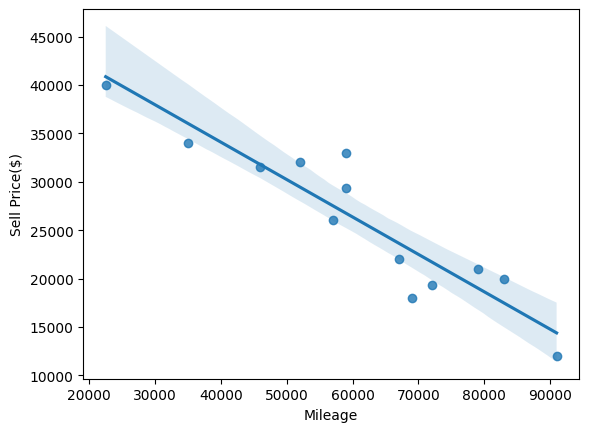

In [382]:
sns.regplot(x=df['Mileage'],y=df['Sell Price($)'])

<Axes: xlabel='Age(yrs)', ylabel='Sell Price($)'>

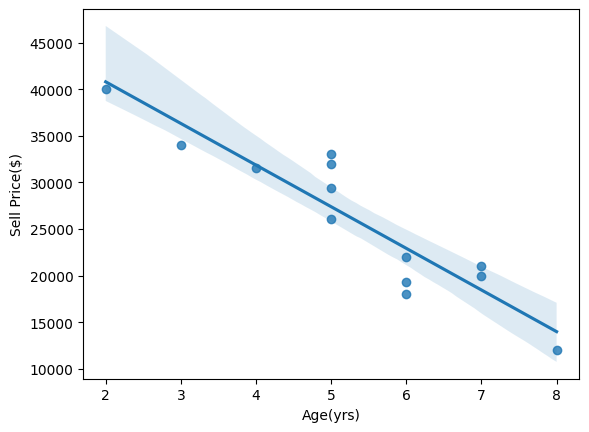

In [383]:
sns.regplot(x=df['Age(yrs)'],y=df['Sell Price($)'])


In [384]:
x=final_df.drop(['Sell Price($)'],axis='columns')
y=final_df['Sell Price($)']

In [385]:
x

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [386]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [387]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [388]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)


LinearRegression()

In [389]:
model.predict([[45000,4,0,0]])

C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [390]:
model.predict([[86000,7,0,1]])


C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [391]:
model.score(x,y)*100

94.17050937281083

In [392]:
# from sklearn.preprocessing import LabelEncoder
# lab=LabelEncoder()

In [393]:
dfle=df
dfle

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [394]:
# dfle['Car Model']=lab.fit_transform(dfle['Car Model'])
# dfle

In [395]:
x=dfle.iloc[:,:-1].values
y=dfle.iloc[:,-1].values

In [396]:
x

array([['BMW X5', 69000, 18000],
       ['BMW X5', 35000, 34000],
       ['BMW X5', 57000, 26100],
       ['BMW X5', 22500, 40000],
       ['BMW X5', 46000, 31500],
       ['Audi A5', 59000, 29400],
       ['Audi A5', 52000, 32000],
       ['Audi A5', 72000, 19300],
       ['Audi A5', 91000, 12000],
       ['Mercedez Benz C class', 67000, 22000],
       ['Mercedez Benz C class', 83000, 20000],
       ['Mercedez Benz C class', 79000, 21000],
       ['Mercedez Benz C class', 59000, 33000]], dtype=object)

In [397]:
y

array([6, 3, 5, 2, 4, 5, 5, 6, 8, 6, 7, 7, 5], dtype=int64)

In [398]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(
    transformers=[
        ('encoder',OneHotEncoder(drop='first'),[0])
    ],
    remainder='passthrough'
)
x=ct.fit_transform(x)

In [399]:
x

array([[1.0, 0.0, 69000, 18000],
       [1.0, 0.0, 35000, 34000],
       [1.0, 0.0, 57000, 26100],
       [1.0, 0.0, 22500, 40000],
       [1.0, 0.0, 46000, 31500],
       [0.0, 0.0, 59000, 29400],
       [0.0, 0.0, 52000, 32000],
       [0.0, 0.0, 72000, 19300],
       [0.0, 0.0, 91000, 12000],
       [0.0, 1.0, 67000, 22000],
       [0.0, 1.0, 83000, 20000],
       [0.0, 1.0, 79000, 21000],
       [0.0, 1.0, 59000, 33000]], dtype=object)

In [400]:
model.predict([[45000,4,0,0]])


C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [401]:
model.predict([[86000,7,0,1]])


C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [402]:
model.score(x,y)

C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-4.19713890337277e+16